<a href="https://colab.research.google.com/github/mugeshraja06/Delhi-weather-_-Time-Series-_-ARIMA-model-/blob/master/Time_series__Delhi_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
df = pd.read_csv('/content/testset.csv', parse_dates=['datetime_utc'], index_col='datetime_utc')
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [0]:
df.isnull().sum()

 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [0]:
weather_condition = (df[' _conds'].value_counts()/(df[' _conds'].value_counts().sum()))*100
weather_condition

Haze                             47.168989
Smoke                            20.571157
Mist                              9.289720
Clear                             3.100537
Widespread Dust                   2.830020
Fog                               2.734894
Scattered Clouds                  2.188906
Partly Cloudy                     2.071979
Shallow Fog                       1.843081
Mostly Cloudy                     1.523019
Light Rain                        1.290156
Partial Fog                       1.021622
Patches of Fog                    0.892804
Thunderstorms and Rain            0.481579
Heavy Fog                         0.417170
Light Drizzle                     0.410234
Rain                              0.390416
Unknown                           0.379516
Blowing Sand                      0.374562
Overcast                          0.323035
Thunderstorm                      0.190253
Light Thunderstorms and Rain      0.174399
Drizzle                           0.110981
Light Thund

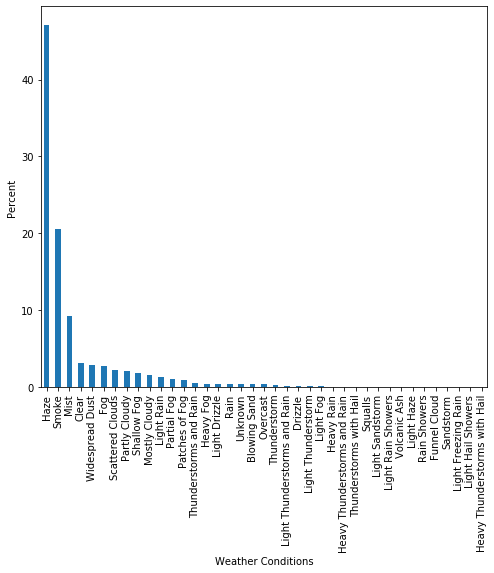

In [0]:
weather_condition.plot.bar(figsize=(8,7))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent');

In [0]:
df.columns

Index([' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],
      dtype='object')

In [0]:
df.columns = map(lambda x: x.strip(), df.columns)
df.columns

Index(['_conds', '_dewptm', '_fog', '_hail', '_heatindexm', '_hum', '_precipm',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wgustm', '_windchillm', '_wspdm'],
      dtype='object')

In [0]:
weather_df = df.loc[:,['_conds', '_hum', '_tempm', '_pressurem']]

In [0]:
weather_df.head()

,_conds,_hum,_tempm,_pressurem
datetime_utc,,,,
1996-11-01 11:00:00,Smoke,27.0,30.0,1010.0
1996-11-01 12:00:00,Smoke,32.0,28.0,-9999.0
1996-11-01 13:00:00,Smoke,44.0,24.0,-9999.0
1996-11-01 14:00:00,Smoke,41.0,24.0,1010.0
1996-11-01 16:00:00,Smoke,47.0,23.0,1011.0


In [0]:
weather_df = weather_df.rename(index=str, columns={'_conds': 'condition', '_hum': 'humidity', '_pressurem': 'pressure', '_tempm': 'temprature'})

In [0]:
weather_df.head()

,condition,humidity,temprature,pressure
datetime_utc,,,,
1996-11-01 11:00:00,Smoke,27.0,30.0,1010.0
1996-11-01 12:00:00,Smoke,32.0,28.0,-9999.0
1996-11-01 13:00:00,Smoke,44.0,24.0,-9999.0
1996-11-01 14:00:00,Smoke,41.0,24.0,1010.0
1996-11-01 16:00:00,Smoke,47.0,23.0,1011.0


In [0]:
weather_df.index

Index(['1996-11-01 11:00:00', '1996-11-01 12:00:00', '1996-11-01 13:00:00',
       '1996-11-01 14:00:00', '1996-11-01 16:00:00', '1996-11-01 17:00:00',
       '1996-11-01 18:00:00', '1996-11-01 19:00:00', '1996-11-01 20:00:00',
       '1996-11-01 21:00:00',
       ...
       '2017-04-23 15:00:00', '2017-04-23 18:00:00', '2017-04-23 21:00:00',
       '2017-04-24 00:00:00', '2017-04-24 03:00:00', '2017-04-24 06:00:00',
       '2017-04-24 09:00:00', '2017-04-24 12:00:00', '2017-04-24 15:00:00',
       '2017-04-24 18:00:00'],
      dtype='object', name='datetime_utc', length=100990)

In [0]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100990, freq=None)

In [0]:
weather_df.isnull().sum()

condition      72
humidity      757
temprature    673
pressure      232
dtype: int64

In [0]:
weather_df.ffill(inplace=True)

In [0]:
weather_df.isnull().sum()

condition     0
humidity      0
temprature    0
pressure      0
dtype: int64

In [0]:
weather_df = weather_df[weather_df.temprature < 50]
weather_df = weather_df[weather_df.humidity <= 100]

In [0]:
weather_df = weather_df.drop('pressure', axis=1)

In [0]:
weather_df.describe()

,humidity,temprature
count,100983.000000,100983.000000
mean,57.955309,25.436361
std,23.805467,8.482944
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,100.000000,47.000000


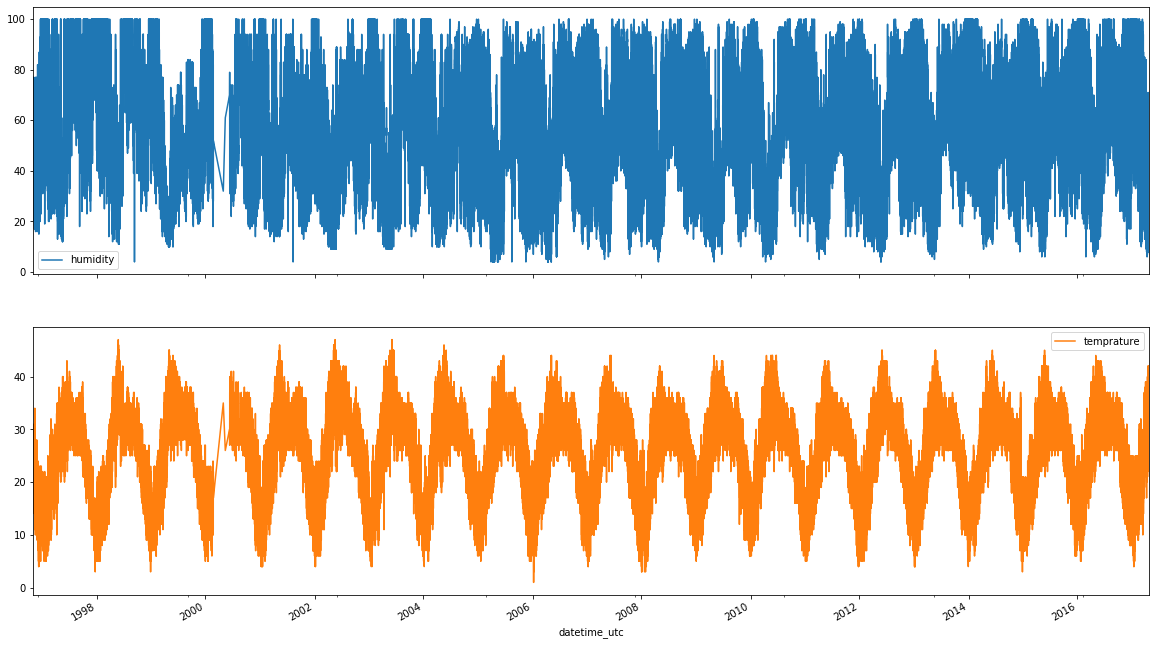

In [0]:
weather_df.plot(subplots=True, figsize=(20,12));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a759413c8>,
      dtype=object)

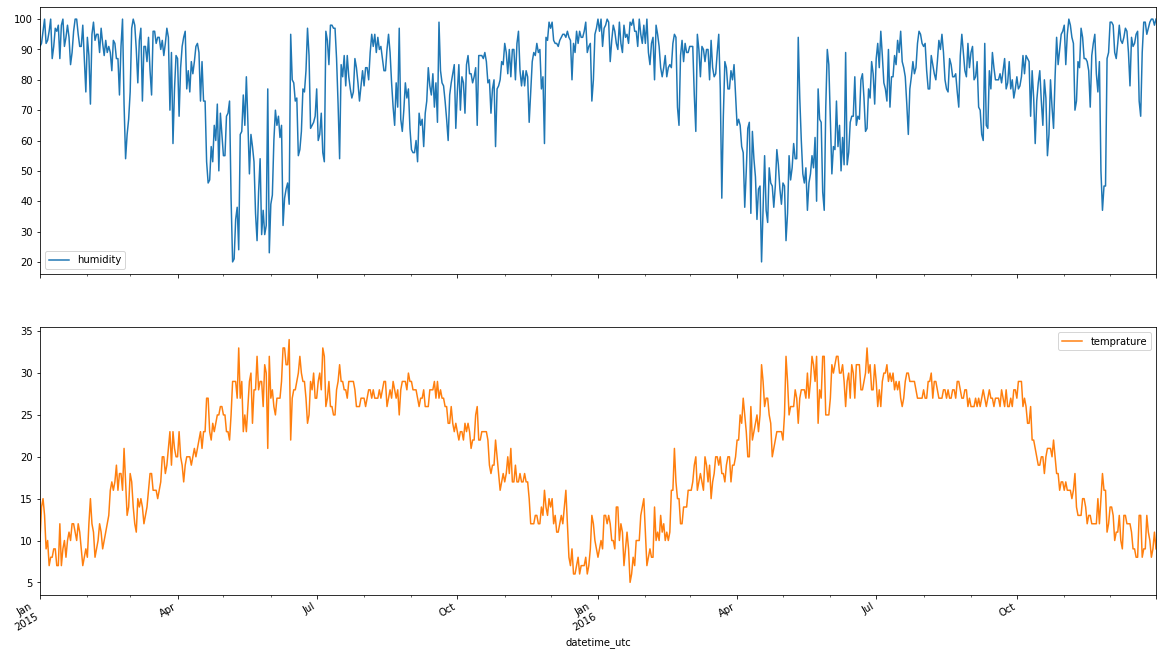

In [0]:
weather_df['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [0]:
train_df = weather_df['2000':'2015'].resample('M').mean().fillna(method='pad')
train_df.drop(columns='humidity', axis=1, inplace=True)
train_df.head()

,temprature
datetime_utc,
2000-01-31,13.707670
2000-02-29,14.918977
2000-03-31,14.918977
2000-04-30,35.000000
2000-05-31,26.000000


In [0]:
test_df = weather_df['2016':'2017'].resample('M').mean().fillna(method='pad')
test_df.drop(columns='humidity', axis=1, inplace=True)

In [0]:
test_df.head()

,temprature
datetime_utc,
2016-01-31,15.007752
2016-02-29,19.468193
2016-03-31,25.696391
2016-04-30,32.546841
2016-05-31,34.777344


Rolling statistics

In [0]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(12,8))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [0]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

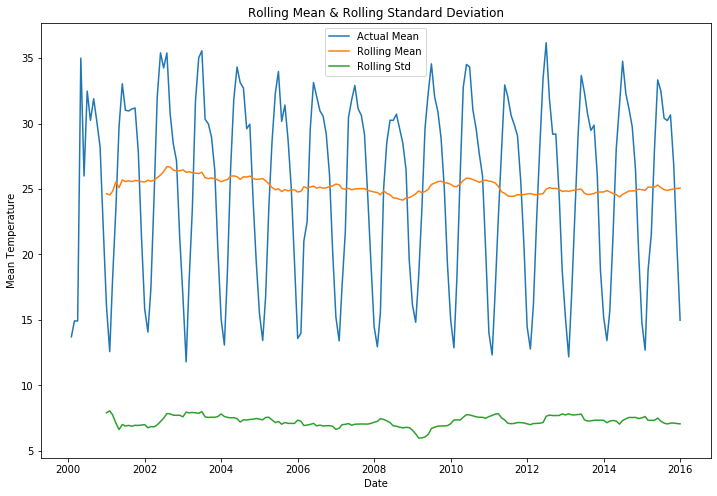

Test statistic:  -2.1269952502980387
Critical Values: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


In [0]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df.temprature)
perform_dickey_fuller_test(train_df.temprature)

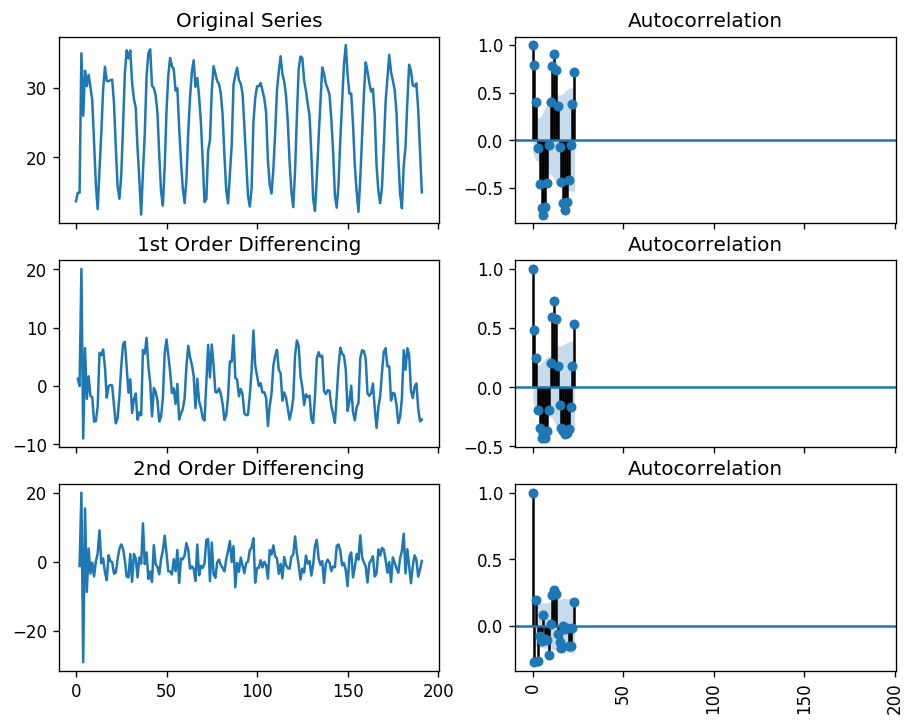

In [0]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train_df.temprature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_df.diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train_df.temprature.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_df.diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


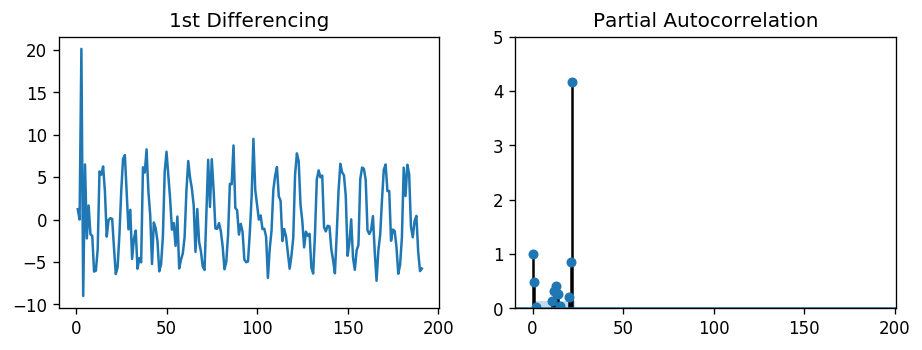

In [0]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

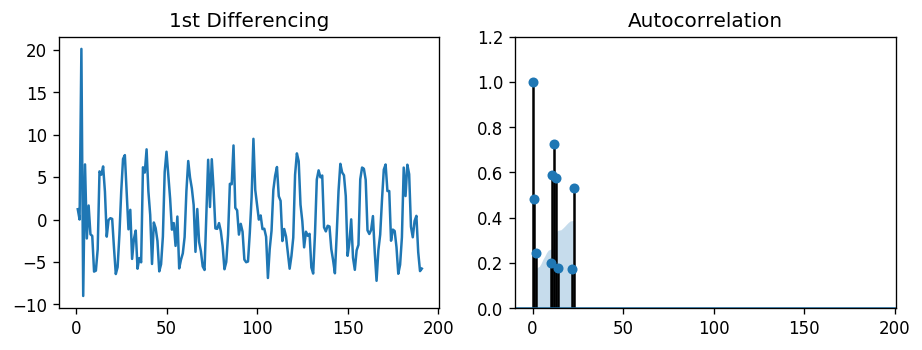

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

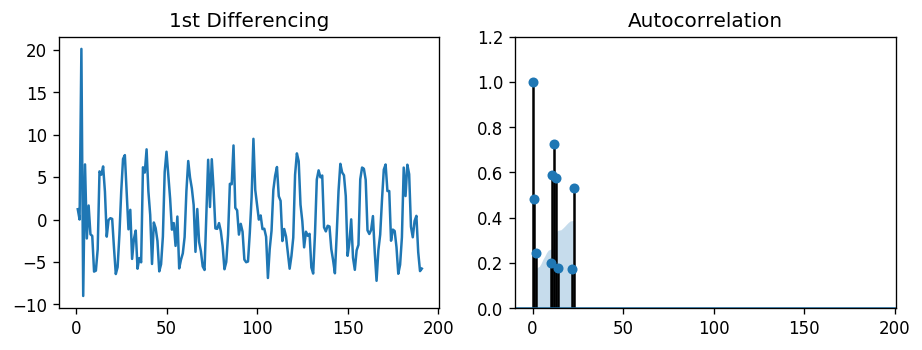

In [0]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_df.diff().dropna().values, ax=axes[1])

plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


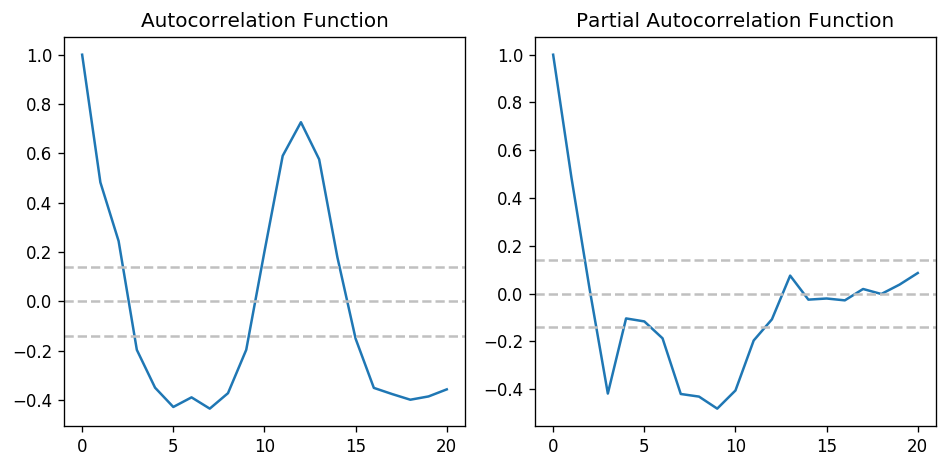

In [0]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [0]:
model = ARIMA(train_df.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  192
Model:                     ARMA(2, 2)   Log Likelihood                -454.355
Method:                       css-mle   S.D. of innovations              2.552
Date:                Thu, 16 Jan 2020   AIC                            920.709
Time:                        18:52:03   BIC                            940.254
Sample:                             0   HQIC                           928.625
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1917      0.119    211.045      0.000      24.958      25.426
ar.L1.y        1.6785      0.024     69.834      0.000       1.631       1.726
ar.L2.y       -0.9519      0.023    -41.163      0.0

<Figure size 960x480 with 0 Axes>

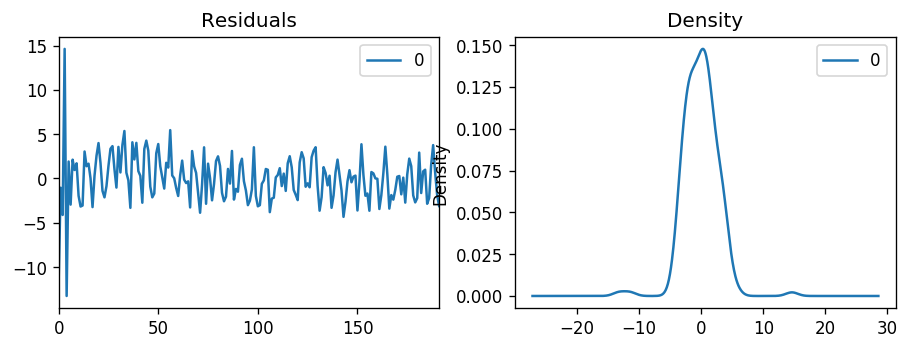

In [0]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(8,4))
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])

residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

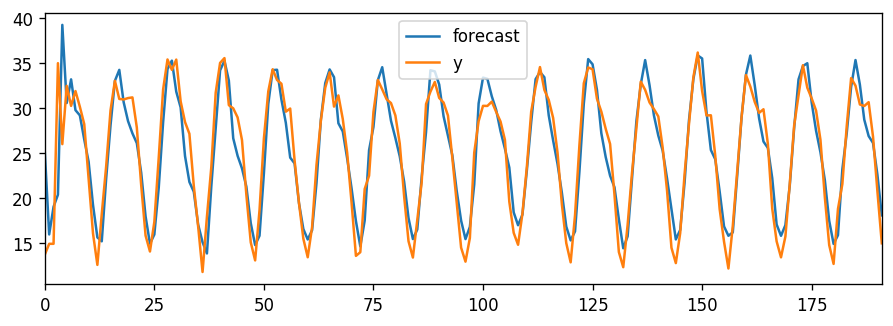

In [0]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

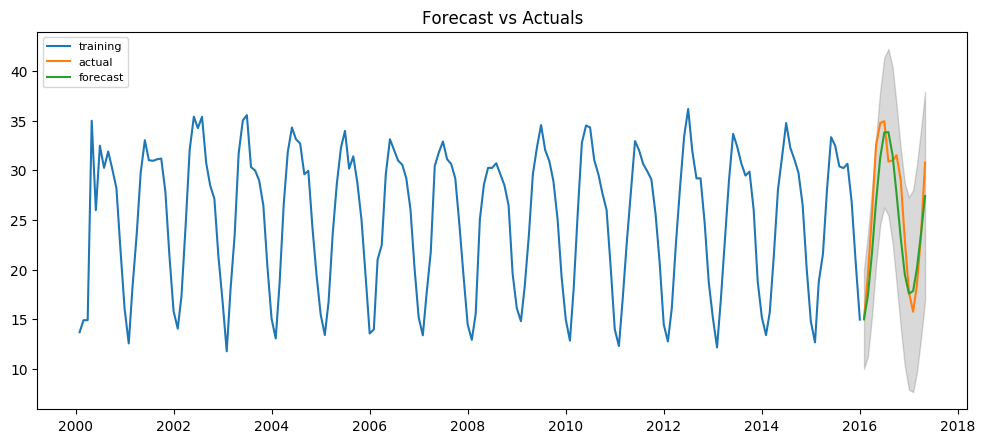

In [0]:
# # Forecast
fc, se, conf = model_fit.forecast(16, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# test_df.index

In [0]:
fc

array([15.02198148, 17.39530857, 21.78618754, 26.89701037, 31.29573135,
       33.81388787, 33.85340769, 31.52270147, 27.57304068, 23.16222245,
       19.51844791, 17.60111715, 17.85143543, 20.09670135, 23.62705476,
       27.41540514])

In [0]:
se

array([2.55172743, 3.12335505, 3.26898988, 3.27036996, 3.4434279 ,
       3.84857098, 4.27400303, 4.52431704, 4.58146893, 4.58591121,
       4.69915602, 4.94166574, 5.19127769, 5.33131725, 5.35697129,
       5.36410787])

In [0]:
conf

array([[10.02068762, 20.02327534],
       [11.27364516, 23.51697198],
       [15.3790851 , 28.19328997],
       [20.48720303, 33.30681772],
       [24.54673668, 38.04472602],
       [26.27082735, 41.35694839],
       [25.47651568, 42.2302997 ],
       [22.65520302, 40.39019992],
       [18.59352658, 36.55255478],
       [14.17400163, 32.15044326],
       [10.30827136, 28.72862447],
       [ 7.91563026, 27.28660403],
       [ 7.67671813, 28.02615273],
       [ 9.64751154, 30.54589115],
       [13.12758397, 34.12652554],
       [16.9019469 , 37.92886337]])